In [1]:
from datetime import datetime

import sys
sys.path.append(r'c:\users\severusbot\appdata\local\programs\python\python39\lib\site-packages')
#sys.path.append(r'c:\users\severusbot\appdata\local\programs\python\python3.8\lib\site-packages')

import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np


## $\color{red}{\text{Get Data}}$

We will use python's Yahoo Finance package to get historical stock data. Following the paper's methods,
we will look at daily return data from 01/01/2001 - 04/01/2014.

In [8]:
# OLD DATA

# We will use the 13 week T bill as the risk free rate
rf = 0.0178

'''
prices = pd.DataFrame()

# For now, we are tracking these 5 positions
positions = ['VZ', 'AAPL', 'T', 'AMD', 'JPM']
startDate = datetime(2018, 1, 1)
endDate = datetime(2019, 1, 1)

for ticker in positions:
    temp = yf.Ticker(ticker).history(start = startDate, end = endDate)[['Close']]
    temp.rename(columns = {'Close': str(ticker)}, inplace = True)
    prices = pd.concat([prices, temp], axis = 1)

# Convert to percent change
returns = prices.pct_change(1).iloc[1:, :]
returns.mean()

prices = pd.read_csv('equity_data_2021.csv')
prices.set_index('Date', inplace = True)
prices = prices.fillna(0)
prices = prices.astype(int)

returns = prices.pct_change(1).iloc[1:, :]
returns = returns.fillna(0)
returns = returns.iloc[1:, :10]

frac=0.75
cutoff=np.floor(frac*len(returns.index)).astype(int)
returns_train = returns.iloc[:cutoff]
returns_test = returns.iloc[cutoff:]


'''
equity_data=pd.read_csv('equity_data_2021.csv')
equity_data.index=equity_data['Date']
equity_data=equity_data.drop(columns=['Date'])

returns=((equity_data/equity_data.shift(1))-1)
returns=returns.fillna(0)
returns=returns.iloc[1:]
frac=0.75
cutoff=np.floor(frac*len(returns.index)).astype(int)

returns_train = returns.iloc[:cutoff]
returns_test = returns.iloc[cutoff:]

returns = returns.iloc[:, :]

positions = list(returns.columns)
TrainDays = len(returns_train)
TestDays = len(returns_test)
returns

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,-0.000042,0.006013,0.002211,0.015649,0.017300,0.004615,0.015550,-0.007733,0.018796,0.010863,...,0.018709,-0.006279,-0.010834,-0.006693,0.012193,-0.000858,0.019863,0.006932,-0.001183,0.004598
2018-01-04,0.013071,0.004685,-0.001697,-0.005703,0.017516,0.011841,-0.009952,0.016843,0.012042,0.009552,...,0.010151,0.007813,0.005415,-0.007791,0.006676,0.010180,0.019760,-0.001441,0.004147,0.005964
2018-01-05,0.007792,0.012864,0.002890,0.017408,0.015408,0.008249,0.026446,-0.006675,0.011571,-0.000591,...,0.006413,0.009277,0.006671,-0.007003,-0.001874,0.005828,0.015576,0.009941,0.000393,0.011444
2018-01-08,-0.003242,0.004763,-0.002882,-0.016022,0.027086,0.007991,0.003917,-0.002240,-0.001619,-0.003043,...,-0.005387,0.000000,-0.013314,0.007480,0.003611,0.001690,0.009951,0.001905,-0.004914,0.011996
2018-01-09,0.006214,-0.000790,0.001700,0.007538,0.009432,0.003335,-0.006604,0.003243,0.008971,0.006953,...,0.002774,-0.004029,0.006778,-0.011667,0.000288,-0.002651,0.030643,-0.016083,0.023509,0.011719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.009887,0.023318,0.016528,0.009918,0.015956,0.029803,0.004450,0.009627,0.014150,0.017727,...,0.010995,0.026123,-0.014626,0.003153,0.006723,0.019728,0.041071,0.006457,0.010423,0.016494
2021-12-28,0.005320,0.009917,-0.006998,-0.000149,-0.001090,-0.000144,0.018640,0.013017,-0.014402,-0.000893,...,-0.001422,0.009145,-0.012788,0.011973,0.010398,-0.000217,-0.014860,0.003130,0.001587,-0.009168
2021-12-29,0.004335,0.003156,0.005126,0.007218,0.012310,0.000361,0.007350,0.001195,-0.000123,0.007884,...,-0.001215,0.008678,-0.017118,0.005028,-0.001339,0.004928,0.006362,0.000156,0.005387,0.011382


Text(0, 0.5, 'Daily Returns')

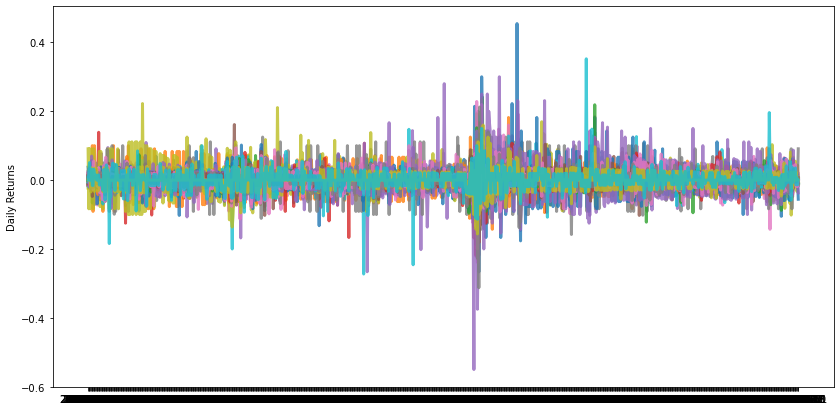

In [20]:
plt.figure(figsize = (14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw = 3, alpha = 0.8, label = c)

plt.ylabel('Daily Returns')

## $\color{red}{\text{Perform Reguralization on the Covariance Matrix}}$

We want to make sure our covariance matrix is nonsingular. Let's use regularization on the covariance matrix and the James Stein estimator for the mean vector.

The regularized covariance matrix is shown as 
$\hat{\Gamma} = \rho_1 \Gamma_S + \rho_2 I$

and the estimated mean
$\hat{\mu} = (1 - \rho)\mu_S + \rho \eta 1$

In [9]:
def regularization(matrix, days):
    
    cov = matrix.cov()

    # Compute sample covariance matrix
    sampleCov = np.dot(returns.values.T, returns.values) / len(matrix.columns)
    sampleMean = matrix.mean()
    
    I = np.identity(len(cov.columns))
    
    # Compute the estimates
    mu = np.dot(cov, I)
    alpha = np.linalg.norm(cov - mu * I)
    beta = np.linalg.norm(sampleCov - cov)
    delta = np.linalg.norm(sampleCov - mu * I)

    row1 = (beta**2)/(alpha**2 + beta**2)
    row2 = (alpha**2)/(delta**2)
    
    covEstimate = row1 * mu * I + row2 * sampleCov  
    
    # Find the mean estimate
    eta = max(sampleMean.sum() / sampleMean.size, 0.0004)
    denom = np.dot(np.dot(np.transpose((sampleMean - eta*np.ones(shape = (len(sampleMean),))).values.reshape((len(sampleMean), 1))), days),
                   np.dot(np.linalg.pinv(covEstimate), (sampleMean - eta*np.ones(shape = (len(sampleMean),))).values.reshape((len(sampleMean), 1))))
    
    rightside = (len(sampleMean) - 2) / 800
    leftside = 1
    rho = min(leftside, rightside)
    meanEstimate = (1 - rho)*sampleMean + rho*eta*np.ones(shape = (len(sampleMean),))
    
    return covEstimate, meanEstimate

estCov, estMean = regularization(returns_train, TrainDays)
print(estCov)
print(estMean)

[[3.19823644e-04 1.28269229e-04 1.00016747e-04 ... 1.15578313e-04
  1.45183085e-04 9.31472581e-05]
 [1.28269229e-04 3.65364940e-04 8.36046043e-05 ... 9.56444070e-05
  1.53438301e-04 8.73440021e-05]
 [1.00016747e-04 8.36046043e-05 3.06921173e-04 ... 1.04226650e-04
  7.78773106e-05 1.30034688e-04]
 ...
 [1.15578313e-04 9.56444070e-05 1.04226650e-04 ... 4.41400938e-04
  1.75803362e-04 1.15330186e-04]
 [1.45183085e-04 1.53438301e-04 7.78773106e-05 ... 1.75803362e-04
  6.36863971e-04 7.89774420e-05]
 [9.31472581e-05 8.73440021e-05 1.30034688e-04 ... 1.15330186e-04
  7.89774420e-05 3.12540236e-04]]
MMM     0.000307
AOS     0.000402
ABT     0.000762
ABBV    0.000514
ABMD    0.000829
          ...   
YUM     0.000597
ZBRA    0.001183
ZBH     0.000587
ZION    0.000433
ZTS     0.000872
Length: 500, dtype: float64


## $\color{red}{\text{Construct Unpenalized Portfolio}}$

Before using the L1 and L2 penalizers, let's build the portfolio under Markowitz's original ideas. This will give us a good point of reference when comparing the results...

We will first compile a bunch of random portfolios and solve for their return and variance. We can select the best one and consider this to be the efficient portfolio.

MAXIMUM SHARPE PORTFOLIO
Annualized Return: 0.534
Annualized Volatility: 0.429
Positions      Weights
MMM		 0.002
AOS		 0.002
ABT		 0.002
ABBV		 0.002
ABMD		 0.003
ACN		 0.002
ATVI		 0.001
ADM		 0.0
ADBE		 0.004
ADP		 0.002
AAP		 0.003
AES		 0.004
AFL		 0.001
A		 0.001
APD		 0.003
AKAM		 0.001
ALK		 0.0
ALB		 0.0
ARE		 0.001
ALGN		 0.004
ALLE		 0.002
LNT		 0.002
ALL		 0.001
GOOGL		 0.004
GOOG		 0.001
MO		 0.003
AMZN		 0.0
AMCR		 0.003
AMD		 0.002
AEE		 0.001
AAL		 0.002
AEP		 0.002
AXP		 0.004
AIG		 0.003
AMT		 0.002
AWK		 0.001
AMP		 0.001
ABC		 0.004
AME		 0.003
AMGN		 0.001
APH		 0.002
ADI		 0.002
ANSS		 0.003
AON		 0.003
APA		 0.002
AAPL		 0.003
AMAT		 0.001
APTV		 0.002
ACGL		 0.002
ANET		 0.002
AJG		 0.003
AIZ		 0.003
T		 0.001
ATO		 0.003
ADSK		 0.002
AZO		 0.003
AVB		 0.001
AVY		 0.001
BKR		 0.001
BALL		 0.003
BAC		 0.0
BBWI		 0.002
BAX		 0.001
BDX		 0.001
WRB		 0.002
BBY		 0.0
BIO		 0.002
TECH		 0.001
BIIB		 0.003
BLK		 0.003
BK		 0.003
BA		 0.001
BKNG		 0.002
BWA		 0.003
BXP	

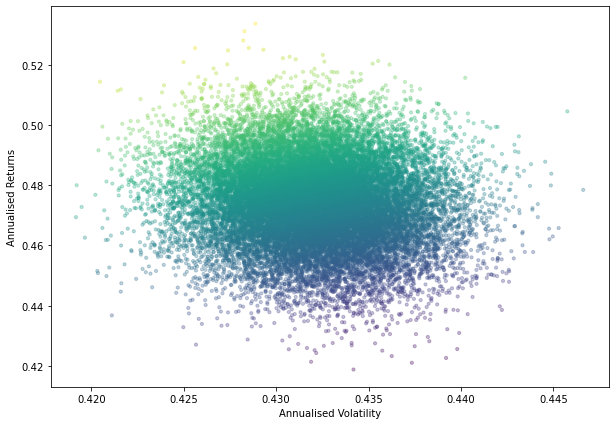

In [11]:
def random_portfolios(numPorts, mean_returns, cov, rf, days):
    
    output = np.zeros((len(mean_returns), numPorts))
    weight_lst = []
    for port in range(numPorts):
        
        weights = np.random.random(len(mean_returns))
        weights = weights / np.sum(weights)
        weight_lst.append(weights)
        
        returns = np.sum(mean_returns * weights) * days
        std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(days)
        
        output[0, port] = std
        output[1, port] = returns
        output[2, port] = (returns - rf) / std
    
    return output, weight_lst

numPorts = 25000
results, weights = random_portfolios(numPorts, returns_train.mean(), returns_train.cov(), rf, TrainDays)

# Find the portfolio with the largest sharpe
sharpe_idx = np.argmax(results[2])
sharpeWeights = weights[sharpe_idx].copy()

print('MAXIMUM SHARPE PORTFOLIO')
print(f'Annualized Return: {np.round(results[1, sharpe_idx], 3)}')
print(f'Annualized Volatility: {np.round(results[0, sharpe_idx], 3)}')

print('Positions      Weights')
for i in range(len(positions)):
    print(positions[i] + '\t\t ' + str(np.round(sharpeWeights[i], 3)))

# Find the portfolio with the minimum variance
std_idx = np.argmin(results[0])
stdWeights = weights[std_idx].copy()

print('\n')
print('MINIMUM VARIANCE PORTFOLIO')
print(f'Annualized Return: {np.round(results[1, std_idx], 3)}')
print(f'Annualized Volatility: {np.round(results[0, std_idx], 3)}')

print('Positions      Weights')
for i in range(len(positions)):
    print(positions[i] + '\t\t ' + str(np.round(stdWeights[i], 3)))
    
# Finally a plot of the portfolios
plt.figure(figsize = (10, 7))
plt.scatter(results[0,:], results[1,:], c = results[2,:], marker = 'o', s = 10, alpha = 0.3)
plt.xlabel('Annualised Volatility')
plt.ylabel('Annualised Returns')


## $\color{red}{\text{Construct Unpenalized Portfolio using Bootstrapping}}$

Bootstrapping is a type of crossvalidation that using randomized sampling to compute estimates. We can follow this process to find the optimal portfolio weights.

In [12]:
def bootstrapping(df, rf):
    
    numPorts = 1000
    sizeSample = int(len(df) / 3)
    
    sample = df.sample(n = sizeSample)
    mean_returns = sample.mean()
    cov = sample.cov()
    
    output = np.zeros((3, numPorts))
    weight_lst = []
    for port in range(numPorts):
        
        weights = np.random.random(len(df.columns))
        weights = weights / np.sum(weights)
        weight_lst.append(weights)
        
        returns = np.sum(mean_returns * weights) * len(sample)
        std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(len(sample))
        
        output[0, port] = std
        output[1, port] = returns
        output[2, port] = (returns - rf) / std
        
    return output, weight_lst
    
iterations = 100
minVarPort_std = 1
maxShpPort_shp = -1

for it in range(iterations):
    
    results, weights = bootstrapping(returns_train.copy(), rf)
    
    sharpe_idx = np.argmax(results[2])
    sharpeWeights = weights[sharpe_idx].copy()

    std_idx = np.argmin(results[0])
    stdWeights = weights[std_idx].copy()
    
    if (results[0, std_idx] < minVarPort_std):
        minVarPort_std = results[0, std_idx]
        minVar_return = results[1, std_idx]
        minVarPort_w = weights[std_idx].copy()
    
    if (results[2, sharpe_idx] > maxShpPort_shp):
        maxShpPort_shp = results[2, sharpe_idx]
        maxShp_return = results[1, sharpe_idx]
        maxShp_std = results[0, sharpe_idx]
        maxShpPort_w = weights[sharpe_idx].copy()

print('MINIMUM VARIANCE PORTFOLIO')
print(f'Annualized Return: {np.round(minVar_return, 3)}')
print(f'Annualized Volatility: {np.round(minVarPort_std, 3)}')
print('Positions      Weights')
for i in range(len(positions)):
    print(positions[i] + '\t\t ' + str(np.round(minVarPort_w[i], 3)))

print('\n')
print('MAXIMUM SHARPE PORTFOLIO')
print(f'Sharpe Ratio: {np.round(maxShpPort_shp, 3)}')
print(f'Annualized Return: {np.round(maxShp_return, 3)}')
print(f'Annualized Volatility: {np.round(maxShp_std, 3)}')
for i in range(len(positions)):
    print(positions[i] + '\t\t ' + str(np.round(maxShpPort_w[i], 3)))


MINIMUM VARIANCE PORTFOLIO
Annualized Return: 0.273
Annualized Volatility: 0.191
Positions      Weights
MMM		 0.004
AOS		 0.004
ABT		 0.002
ABBV		 0.0
ABMD		 0.003
ACN		 0.003
ATVI		 0.0
ADM		 0.003
ADBE		 0.002
ADP		 0.001
AAP		 0.002
AES		 0.001
AFL		 0.003
A		 0.001
APD		 0.003
AKAM		 0.002
ALK		 0.001
ALB		 0.002
ARE		 0.004
ALGN		 0.002
ALLE		 0.004
LNT		 0.003
ALL		 0.004
GOOGL		 0.0
GOOG		 0.001
MO		 0.0
AMZN		 0.004
AMCR		 0.004
AMD		 0.003
AEE		 0.003
AAL		 0.002
AEP		 0.003
AXP		 0.0
AIG		 0.002
AMT		 0.001
AWK		 0.002
AMP		 0.0
ABC		 0.003
AME		 0.003
AMGN		 0.001
APH		 0.004
ADI		 0.0
ANSS		 0.003
AON		 0.001
APA		 0.0
AAPL		 0.003
AMAT		 0.003
APTV		 0.0
ACGL		 0.0
ANET		 0.004
AJG		 0.001
AIZ		 0.001
T		 0.002
ATO		 0.003
ADSK		 0.001
AZO		 0.003
AVB		 0.001
AVY		 0.001
BKR		 0.001
BALL		 0.002
BAC		 0.001
BBWI		 0.001
BAX		 0.002
BDX		 0.003
WRB		 0.002
BBY		 0.003
BIO		 0.004
TECH		 0.003
BIIB		 0.0
BLK		 0.0
BK		 0.002
BA		 0.001
BKNG		 0.004
BWA		 0.003
BXP		 0.0
BSX	

## $\color{red}{\text{Out of Sample Testing}}$

The last thing we need to do is test the unpenalized portfolio for its out of sample results. We used the returns training set earlier, now we will use the test set.

In [14]:
# We are using the testing data set, starting with the original mean-variance method

stdWeights
returnsOOS = np.sum(returns_test.mean() * stdWeights) * len(returns_test)
stdOOS = np.sqrt(np.dot(stdWeights.T, np.dot(returns_test.cov(), stdWeights))) * np.sqrt(len(returns_test))
sharpOOS = (returnsOOS - rf) / stdOOS
print(f'THE OUT OF SAMPLE RETURN USING MEAN-VARIANCE IS: RETURN:{np.round(returnsOOS, 3)}, VARIANCE: {np.round(stdOOS, 3)}, SHARPE: {np.round(sharpOOS, 3)}')

# Out of sample using the bootstrapping method
returnsOOSbs = np.sum(returns_test.mean() * minVarPort_w) * len(returns_test)
stdOOSbs = np.sqrt(np.dot(minVarPort_w.T, np.dot(returns_test.cov(), minVarPort_w))) * np.sqrt(len(returns_test))
sharp = (returnsOOSbs - rf) / stdOOSbs
print(f'THE OUT OF SAMPLE RETURN USING MEAN-VARIANCE IS: RETURN:{np.round(returnsOOSbs, 3)}, VARIANCE: {np.round(stdOOSbs, 3)}, SHARPE: {np.round(sharp, 3)}')

THE OUT OF SAMPLE RETURN USING MEAN-VARIANCE IS: RETURN:0.263, VARIANCE: 0.132, SHARPE: 1.863
THE OUT OF SAMPLE RETURN USING MEAN-VARIANCE IS: RETURN:0.264, VARIANCE: 0.131, SHARPE: 1.872
